```{=latex}
\usepackage{hyperref}
\usepackage{graphicx}
\usepackage{listings}
\usepackage{textcomp}
\usepackage{fancyvrb}

\newcommand{\passthrough}[1]{\lstset{mathescape=false}#1\lstset{mathescape=true}}

\title{Jupyter as Your GitHub Console}
\author{Moshe Zadka -- https://cobordism.com}
\date{2020}

\begin{document}
\begin{titlepage}
\maketitle
\end{titlepage}

\frame{\titlepage}
```

```{=latex}
\begin{frame}
\frametitle{Health and Safety}

Stay safe

Stay healthy

Wear masks

\end{frame}
```

```{=latex}
\begin{frame}
\frametitle{The World in 2020}

...never mind

\end{frame}
```

```{=latex}
\begin{frame}
\frametitle{The World in 2019}

\begin{itemize}
\item GitHub
\item Microservices \pause
\item Microrepositories
\end{itemize}

\end{frame}
```

```{=latex}
\begin{frame}
\frametitle{GitHub Automation}

\begin{itemize}
\item Great API!
\item Great UI! \pause
\item But different
\end{itemize}

\end{frame}
```

```{=latex}
\begin{frame}
\frametitle{GitHub Automation}

\begin{itemize}
\item Not optional: repos ~ people+
\item Dangerous
\item Exploratory
\end{itemize}

\end{frame}
```

## Intro to Jupyter

### Origin: Data Science

```{=latex}
\begin{frame}
\frametitle{Jupyter}

Origin: data science

Features:

\begin{itemize}
\item Exploration
\item Sharing
\end{itemize}

\end{frame}
```

### Browser-based Interaction

```{=latex}
\begin{frame}
\frametitle{Browser Interaction}

Universal UI

\end{frame}
```

### Notebooks

```{=latex}
\begin{frame}
\frametitle{Notebooks}

Artifacts of exploration session \pause

Share or export

\end{frame}
```

## Intro to GitHub3

### Python API to GitHub API3

```{=latex}
\begin{frame}[fragile]
\frametitle{Notebooks}

\begin{lstlisting}
$ pip install github3.py
Collecting github3.py       
...
Successfully installed... github3.py-1.3.0 ...
\end{lstlisting}
```

In [1]:
import github3

```{=latex}
\end{frame}
```

### Small Example

```{=latex}
\begin{frame}[fragile]
\frametitle{Using GitHub3}
```

In [3]:
import os
with open(os.path.expanduser("~/.github-token")) as fpin:
    token = fpin.read().strip()
ghclient = github3.GitHub(token=token)

In [12]:
ghclient.organization("too-many-repos").name

'Demo Organization for Jupyter Talk'

```{=latex}
\end{frame}
```

## Analyzing Data in Repositories

### Listing Repos in Organization

```{=latex}
\begin{frame}[fragile]
\frametitle{Listing Repositories}
```

In [26]:
organization = ghclient.organization("too-many-repos")

In [27]:
for repository in organization.repositories():
    print(repository.name)

project-1
project-2
project-3


```{=latex}
\end{frame}
```

### Getting Content from Repository

```{=latex}
\begin{frame}[fragile]
\frametitle{Getting Content}
```

In [19]:
project_1 = ghclient.repository("too-many-repos", "project-1")

In [25]:
contents = project_1.file_contents("README.md")
data = contents.decoded.decode("utf-8")
print(data.splitlines()[0])

# project-1


```{=latex}
\end{frame}
```

### Example: Summarizing Licenses

```{=latex}
\begin{frame}[fragile]
\frametitle{Summarizing Licenses}
```

In [33]:
for repository in organization.repositories():
    contents = repository.file_contents("LICENSE")
    data = contents.decoded.decode("utf-8")
    print(repository.name, data.splitlines()[0].strip())

project-1 MIT License
project-2 MIT License
project-3 Apache License


```{=latex}
\end{frame}
```

## Automating PRs

### Creating a Branch

```{=latex}
\begin{frame}[fragile]
\frametitle{Creating a Branch}
```

In [44]:
root = next(project_1.commits())

'1c6fc1633ae2345b63bd5002195bd22efe479861'

In [45]:
branch = project_1.create_branch_ref("change-readme", sha=root.sha)

```{=latex}
\end{frame}
```

### Changing a File

```{=latex}
\begin{frame}[fragile]
\frametitle{Changing a File}
```

In [47]:
readme = project_1.file_contents("README.md", ref=branch.ref)

In [50]:
current = readme.decoded.decode("utf-8")
current += "\nUpdated in November, 2020"

In [53]:
readme.update("Updating thing", content=current.encode("utf-8"), branch=branch.ref)

{'content': <Contents [README.md]>,
 'commit': <Commit [2314674db5f05bcd5dd68a20daca682554ae3034]>,
 'Last-Modified': '',
 'ETag': 'W/"f8521eebc27a2546b8799d75e7c7e5c3bf62bda755519173aca09b61bafd465a"'}

```{=latex}
\end{frame}
```

```{=latex}
\begin{frame}[fragile]
\frametitle{Changing a File}
```

### Creating a PR

In [54]:
project_1.create_pull("Update README", "main", "change-readme")

<Short Pull Request [#1]>

```{=latex}
\end{frame}
```

## Verify manually

In [55]:
from PIL import Image
image = Image.open("pr.png")

In [60]:
width, height = image.size
smaller_image = image.resize((width//2, height//2))

```{=latex}
\begin{frame}[fragile]
\frametitle{Verify Manually}
```

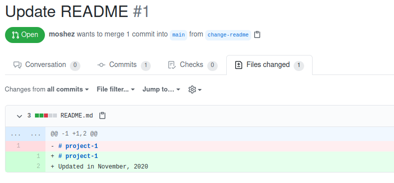

In [61]:
smaller_image

### Testing on 1, 2, all

```{=latex}
\begin{frame}[fragile]
\frametitle{Loop}
```

In [65]:
for project in organization.repositories():
    if project.name == "project-1":
        continue # skip
    root = next(project.commits())
    branch = project.create_branch_ref("change-readme", sha=root.sha)
    readme = project.file_contents("README.md", ref=branch.ref)
    current = readme.decoded.decode("utf-8")
    current += "\nUpdated in November, 2020"
    readme.update("Updating thing", content=current.encode("utf-8"), branch=branch.ref)
    project.create_pull("Update README", "main", "change-readme")

```{=latex}
\end{frame}
```

## Conclusion

### UI vs. API

```{=latex}
\begin{frame}
\frametitle{UI vs API}

Writing new code? Use UI \pause

Need consistency? API!

\end{frame}
```

```{=latex}
\begin{frame}
\frametitle{Everything via Source Control}

PR/Issue templates

Actions

README

License

...
\end{frame}
```

### Documented Changes

```{=latex}
\begin{frame}
\frametitle{Sometimes You F Up}

To mess up one repository is human,
to destroy all of them takes a computer...and a human \pause

Attaching notebooks to tickets

Repeatable and documented

\end{frame}
```

```{=latex}
\begin{frame}
\frametitle{Conclusion}

If you are using GitHub the way it was meant to be used...\pause

have a plan for automating changes.

\end{frame}
```

```{=latex}
\end{document}
```